In [2]:
# Basic SIR model (adapted) Jan Nagler (speak Sir Jan Nagler), v2
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
from icecream import ic 

In [3]:
#Predifined variables

# Population size
N = 3000

# Initial conditions: 7 Infected, no Recovered individuals
I0, R0 = 7, 0 #case zero

# All others, S=N-I-R susceptible, initially S0=N-I0-R0
S0 = N - I0 - R0 #normalization

# Contact rate, beta, how agressive virus is; 
# Recovery rate, gamma, here assumes no death!!! 0.15 meaning revover ove 1 week: 1/7 = 0.15... depends on the interpretation using days/ hours/ seconds... always 1 over duration we defined
beta, gamma = 0.39, 0.15

In [4]:
# Basic reproduction number R0 (speak R nought), average number of individuals that get infected over the period where an infected person is infectious at time 0 where no one is infected 
# gamma gives the time scale used to calculate recovery rate 
# R0 is direct proportional to beta
R_nought = beta / gamma #logic not explained 

# by pure logic, or following the literature
# https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1a-epidemiology/epidemic-theory
# R_effective = R_nought * S/N, as used in the plot

ic("Population size:", N)
ic("Infected at t=0:", I0)
ic ("R0=",R_nought)

# A grid of time points (in days)
t = np.linspace(0, 150, 150)


ic| 'Population size:', N: 3000
ic| 'Infected at t=0:', I0: 7
ic| 'R0=', R_nought: 2.6


In [5]:
# SIR model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N #for all N that are not =1
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

#1/gamma average time to recover

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid t.
# args takes all parameters
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # return 3 vectors

In [6]:
#find R_effective = 1 time
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time]/N < 1: 
        t_1 = time
        break
ic("R_eff=1 at t=", t_1, "d")

ic| 'R_eff=1 at t=', t_1: 28, 'd'


('R_eff=1 at t=', 28, 'd')

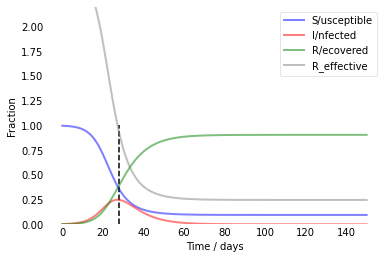

In [7]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,2.2)
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## Question 1a)
The SIR model is a 3-compartment model. Extend this model to 4 com-partments, where the 4th compartment is for deaths (D). Mortality ismodelled by new transitions fromI→Ddefined by the mortality rateμ.Susceptible and Recovered do not die.(a) Derive the corresponding system of equations for S, I, R and D. E.g.,dDdt=μIbut this is not the only difference to SIR. In addition, the basicreproduction number may now depend onμas well, how?

(a) Derive the corresponding system of equations for S, I, R and D. E.g.,dDdt=μIbut this is not the only difference to SIR. In addition, the basicreproduction number may now depend on μ as well, how?

In [30]:
def deriv_sird(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N #for all N that are not =1
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

N = 3000 # Population size
I0, R0, D0 = 10, 0, 0 #Initial conditions t=0
S0 = N - I0 - R0 - D0 #Normalization

beta = 0.5 # = 1 /2 days 
gamma = 0.25 # = 1 /4 days
mu = 0.01 # = 1 /20 days
# Using "1 day" as time unit

R_nought = beta / (gamma + mu) 

t = np.linspace(0, 365, 365)



# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIRD equations over the time grid t. args takes all parameters
ret = odeint(deriv_sird, y0, t, args=(N, beta, gamma, mu))
S, I, R, D = ret.T # return 4 vectors


t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time]/N < 1: 
        t_1 = time
        break
ic("R_eff=1 at t=", t_1, "d")

#Print Info.:
ic("Population size:", N)
ic("Infected at t=0:", I0)
ic("R0=",R_nought)
ic(D[-1])
ic("R_eff=1 at t=", t_1, "d")

ic| 'R_eff=1 at t=', t_1: 22, 'd'
ic| 'Population size:', N: 3000
ic| 'Infected at t=0:', I0: 10
ic| 'R0=', R_nought: 1.923076923076923
ic| D[-1]: 95.75395205531095
ic| 'R_eff=1 at t=', t_1: 22, 'd'


('R_eff=1 at t=', 22, 'd')

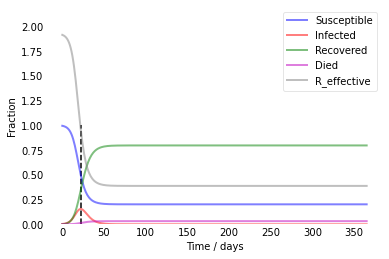

In [28]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, D/N, 'm', alpha=0.5, lw=2, label='Died')
ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,2.2)
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## Question 1b)
(b) Assume that the basic reproduction number R0 for COVID-B117 is not exactly known but only the range R_nought ∈ [3.0,4.0]. Assume that the mortality rate mu is also not exactly known but only the range mu ∈ [0.4%,4%]. Studyhow these parameter uncertainties affect the prediction of D at t=365d. What about the cumulative number of deaths after a year?